In [1]:
import numpy as np
import pandas as pd

import dask.dataframe as dd
import dask.array as da
import dask.bag as db

In [2]:
from dask.distributed import Client

client = Client(n_workers=4)

2022-06-29 18:03:40,499 - distributed.diskutils - INFO - Found stale lock file and directory '/home/thomas/github/more-data/examples/dask-worker-space/worker-fprkyi29', purging
2022-06-29 18:03:40,500 - distributed.diskutils - INFO - Found stale lock file and directory '/home/thomas/github/more-data/examples/dask-worker-space/worker-sbijhqm5', purging
2022-06-29 18:03:40,500 - distributed.diskutils - INFO - Found stale lock file and directory '/home/thomas/github/more-data/examples/dask-worker-space/worker-h1wrlrj3', purging
2022-06-29 18:03:40,501 - distributed.diskutils - INFO - Found stale lock file and directory '/home/thomas/github/more-data/examples/dask-worker-space/worker-rwa85krd', purging


In [3]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 4,Total memory: 15.59 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:38109,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 15.59 GiB
Comm: tcp://127.0.0.1:40329,Total threads: 1
Dashboard: http://127.0.0.1:46615/status,Memory: 3.90 GiB
Nanny: tcp://127.0.0.1:35717,


In [9]:
b = db.from_sequence([1, 2, 3, 4, 5, 6, 2, 1], npartitions=2)
b

dask.bag<from_sequence, npartitions=2>

In [10]:
b.sum()

In [13]:
b.sum().compute()

24

## Array

In [8]:
data = np.arange(100_000).reshape(200, 500)
a = da.from_array(data, chunks=(100, 100))
a

dask.array<array, shape=(200, 500), dtype=int64, chunksize=(100, 100), chunktype=numpy.ndarray>

In [14]:
a[:50, 200]

dask.array<getitem, shape=(50,), dtype=int64, chunksize=(50,), chunktype=numpy.ndarray>

In [15]:
a[:50, 200].compute()

array([  200,   700,  1200,  1700,  2200,  2700,  3200,  3700,  4200,
        4700,  5200,  5700,  6200,  6700,  7200,  7700,  8200,  8700,
        9200,  9700, 10200, 10700, 11200, 11700, 12200, 12700, 13200,
       13700, 14200, 14700, 15200, 15700, 16200, 16700, 17200, 17700,
       18200, 18700, 19200, 19700, 20200, 20700, 21200, 21700, 22200,
       22700, 23200, 23700, 24200, 24700])

In [16]:
a.mean().compute()

49999.5

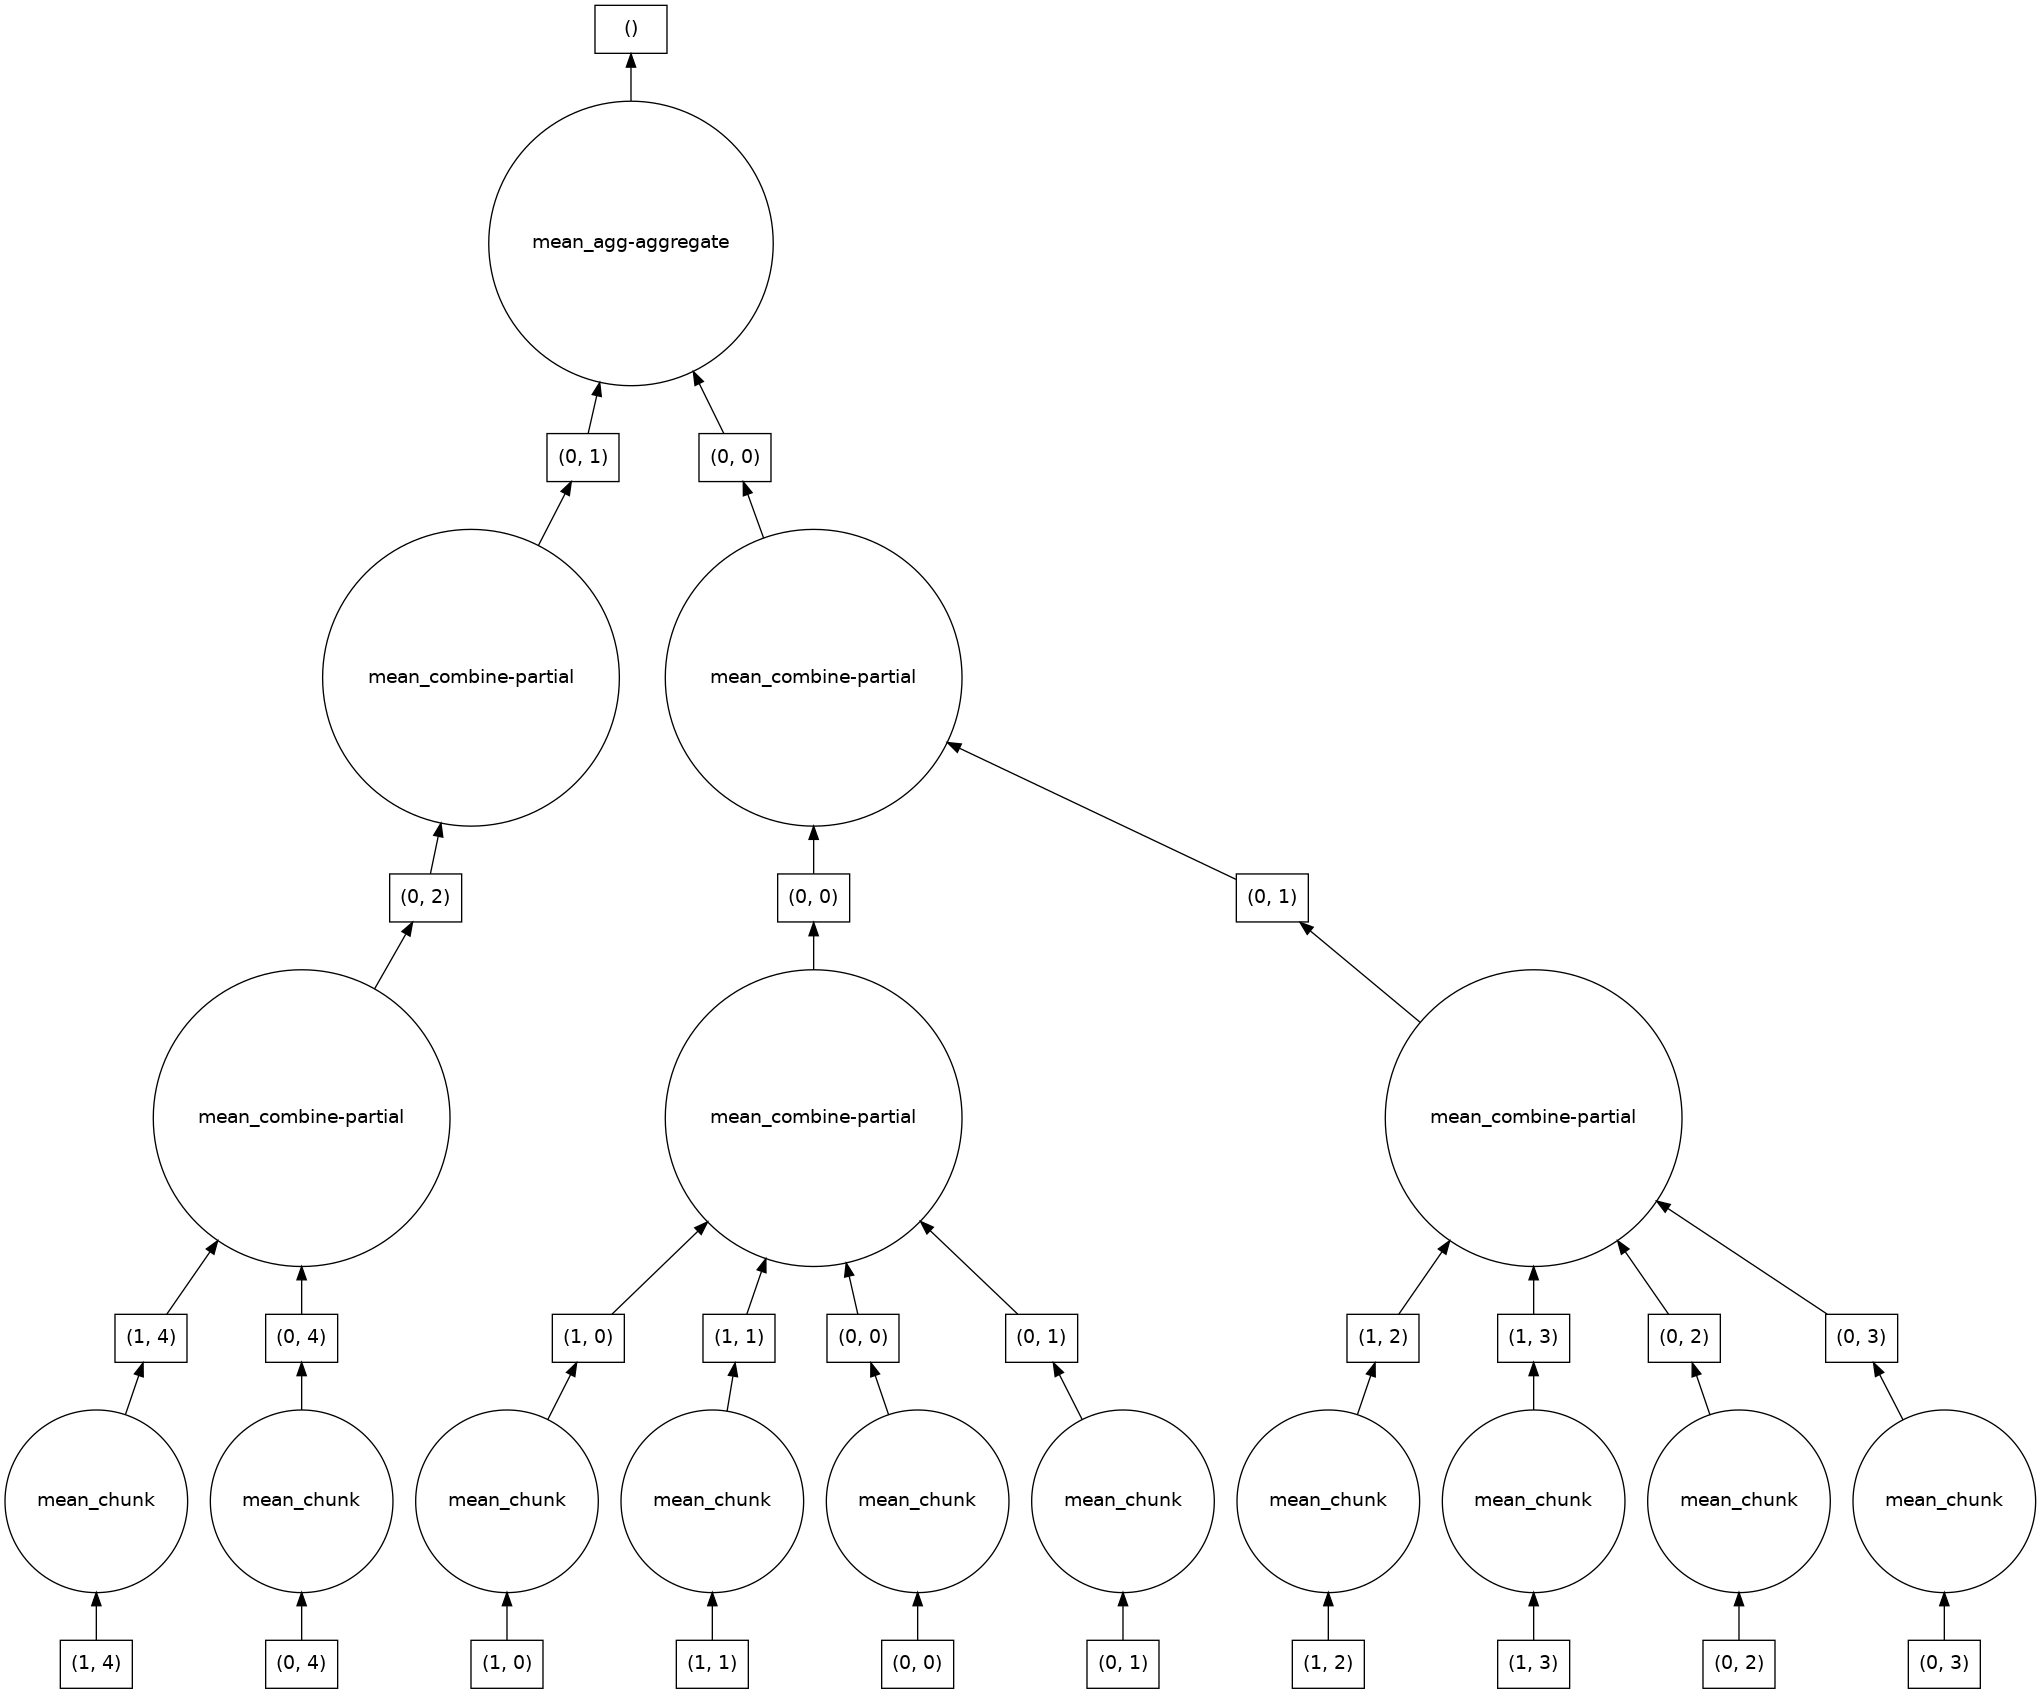

In [18]:
a.mean().visualize()

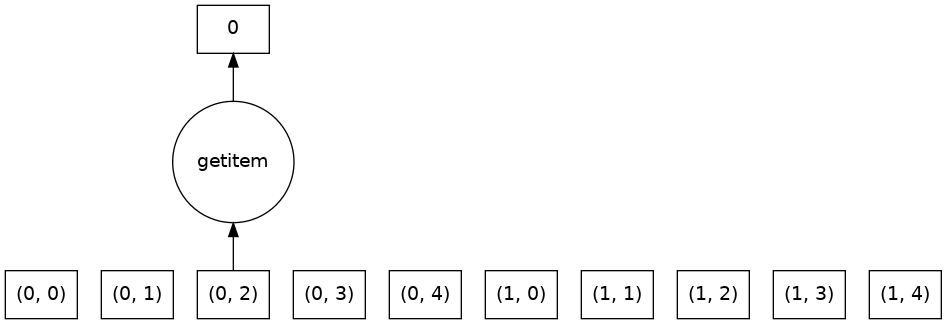

In [19]:
a[:50, 200].visualize()

## dask.dataframe